In [51]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import tensorflow as tf
import pathlib

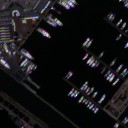

In [56]:
IMG_DIR = 'results/test'
img_ms = '00031-ms.png'
img_pan = '00031-pan.png'
img_sr_pre = '00031-sr-pre.png'
img_sr_gan = '00031-sr-gan.png'

img_ms = tf.keras.preprocessing.image.load_img(pathlib.Path(IMG_DIR).joinpath(img_ms), color_mode='rgb')
img_ms

In [177]:
def plot_get_bbox(center_pixels, size=24):
    bbox = {}
    assert size % 2 == 0
    bbox['x'] = (int(center_pixels[0] - size/2), int(center_pixels[0] + size/2))
    bbox['y'] = (int(center_pixels[1] - size/2), int(center_pixels[1] + size/2))
    return bbox

plot_get_bbox((40,60), size=24)

{'x': (28, 52), 'y': (48, 72)}

In [194]:
bbox1 = plot_get_bbox((21, 51), size=32)
bbox2 = plot_get_bbox((87, 96), size=32)
    
img_width = 512
img_height = 512
fig = make_subplots(
    rows=2, cols=2, 
    specs=[[{'type': 'image', 'colspan': 2}, None],
           [{'type': 'image'},               {'type': 'image'}]], 
    column_widths=[0.5, 0.5],
    row_heights=[0.62, 0.30], 
    horizontal_spacing=0.01, 
    vertical_spacing=0.01,
    shared_xaxes=False,
    shared_yaxes=False,
    )

fig.add_trace(go.Image(z=img_ms),
                 row=1, col=1)
fig.add_shape(
    type='rect',
    x0=bbox1['x'][0], x1=bbox1['x'][1], 
    y0=bbox1['y'][0], y1=bbox1['y'][1],
    xref='x', yref='y',
    line_color='cyan', row=1, col=1
)

fig.add_shape(
    type='rect',
    x0=bbox2['x'][0], x1=bbox2['x'][1], 
    y0=bbox2['y'][0], y1=bbox2['y'][1],
    xref='x', yref='y',
    line_color='yellow', row=1, col=1
)

fig.add_trace(go.Image(z=img_ms),
                 row=2, col=1)
fig.add_trace(go.Image(z=img_ms),
                 row=2, col=2)

fig.update_layout(showlegend=False,
                  height=img_height + img_width / 2, 
                  width=img_width, 
                  margin=dict(l=3, r=3, b=3, t=3, pad=0)
                 )

fig.update_yaxes(scaleanchor = 'x', row=1, col=1)
fig.update_yaxes(showline=True, linewidth=3, linecolor='cyan', mirror=True, row=2, col=1, 
                 range=[bbox1['y'][1], bbox1['y'][0]])
fig.update_xaxes(showline=True, linewidth=3, linecolor='cyan', mirror=True, row=2, col=1, 
                 range=[bbox1['x'][0], bbox1['x'][1]])
fig.update_yaxes(showline=True, linewidth=3, linecolor='yellow', mirror=True, row=2, col=2, 
                 range=[bbox2['y'][1], bbox2['y'][0]])
fig.update_xaxes(showline=True, linewidth=3, linecolor='yellow', mirror=True, row=2, col=2, 
                 range=[bbox2['x'][0], bbox2['x'][1]])
fig.update_xaxes(showgrid=False, showticklabels=False)
fig.update_yaxes(showgrid=False, showticklabels=False)

# Define dragmode, newshape parameters, amd add modebar buttons
fig.show(config={'modeBarButtonsToAdd':['drawrect',
                                        'eraseshape'
                                       ]})